In [2]:
#include "ROOT/RDataFrame.hxx"
#include "ROOT/RVec.hxx"
#include <ROOT/RLogger.hxx>
#include "TCanvas.h"
#include "TFile.h"
#include "TH1D.h"
#include "TF1.h"
#include "TMath.h"
#include "THStack.h"
#include "TLegend.h"
#include "Math/Vector4D.h"
#include <TTreeReader.h>
#include <TTreeReaderArray.h>
#include "ROOT/RDataFrame.hxx"
#include "ROOT/RNTupleDS.hxx"
#include "ROOT/RVec.hxx"
#include <ROOT/RLogger.hxx>

//cpp
#include <vector>
#include <iostream>
#include <fstream>
#include <iomanip>
#include <cstdlib>
#include <cstdio>
#include <string>
#include <Math/GenVector/LorentzVector.h>
#include <Math/GenVector/PtEtaPhiM4D.h>
#include <stdlib.h>
#include <math.h>
#include <TH1.h>

template <typename T> using Vec = ROOT::RVec<T>; 

In [6]:
const char * f = "tree";
std::string f_s = f;
std::cout << (f_s=="tree") << f_s;

1tree

In [17]:
ROOT::RDataFrame df("Events","stream/stream2_pure2.root");
df.Describe()

(ROOT::RDF::RDFDescription) Dataframe from TChain Events in file stream/stream2_pure2.root

Property                Value
--------                -----
Columns in total           11
Columns from defines        0
Event loops run             0
Processing slots            1

Column  Type                                    Origin
------  ----                                    ------
Npuppi  UShort_t                                Dataset
Orbit   UInt_t                                  Dataset
dxy     ROOT::VecOps::RVec<float>               Dataset
eg_id   ROOT::VecOps::RVec<unsigned short>      Dataset
eta     ROOT::VecOps::RVec<float>               Dataset
phi     ROOT::VecOps::RVec<float>               Dataset
pid     ROOT::VecOps::RVec<short>               Dataset
pt      ROOT::VecOps::RVec<float>               Dataset
quality ROOT::VecOps::RVec<unsigned short>      Dataset
wpuppi  ROOT::VecOps::RVec<float>               Dataset
z0      ROOT::VecOps::RVec<float>               Dataset


### TTree Reader

In [3]:
// TFile file("Tree.root", "READ");

// // Crea un TTreeReader per il TTree "Events"
// TTreeReader reader("Events", &file);

// // Ottieni il TTreeReaderArray per il branch "pt"
// TTreeReaderArray<float> pt_array(reader, "pt");

// // Leggi i dati del branch "pt"
// while (reader.Next()) {
//     // Accesso agli elementi del branch "pt" tramite pt_array
//     for (size_t i = 0; i < pt_array.GetSize(); ++i) {
//         std::cout << "pt[" << i << "] = " << pt_array[0] << std::endl;
//     }
// }
// // Chiudi il file
// file.Close();

In [4]:
file.GetListOfKeys()->Contains("Events")

input_line_79:2:3: error: use of undeclared identifier 'file'
 (file.GetListOfKeys()->Contains("Events"))
  ^
Error in <HandleInterpreterException>: Error evaluating expression (file.GetListOfKeys()->Contains("Events"))
Execution of your code was aborted.


In [5]:
TTree* tree = dynamic_cast<TTree*>(file.Get("Events"));
TBranch* branch_pt = tree->GetBranch("pt");
// TLeaf *myLeaf = "pt" -> GetLeaf("pt"->GetName)

input_line_81:2:25: error: use of undeclared identifier 'file'
 (dynamic_cast<TTree *>(file.Get("Events")))
                        ^
Error in <HandleInterpreterException>: Error evaluating expression (dynamic_cast<TTree *>(file.Get("Events")))
Execution of your code was aborted.


In [18]:
auto gen_pt0 = df.Take<ROOT::VecOps::RVec<Float_t>>("pt").GetValue();
std::cout << gen_pt0.size() << std::endl;
std::cout << gen_pt0[0];

59994
{ 2, 3.75, 2, 10, 2.75, 2.25, 3, 3.75, 2.25, 2, 2, 2.5, 17.25, 2.25, 10, 2, 2.75, 4.25, 3.5, 3, 10.75, 3.5, 4.5, 2.75, 3.75, 2, 12.25, 3.25, 3.5, 29.25, 2.75, 2.5, 2.25, 5, 2, 2.25, 2.25, 2, 2.25, 3.25, 2.25, 2.25, 2.75, 2.75, 3.25, 2.5, 3, 4.5, 4.75, 2.5, 2 }

In [19]:
auto np = df.Take<UInt_t>("npuppi").GetValue();
std::cout << np[0] << std::endl;
std::cout << np.size();

In [16]:
*df.Count()

(unsigned long long) 59994


In [3]:
ROOT::RDataFrame df2("Events","stream/stream2_pure.root");
df2.Describe()

(ROOT::RDF::RDFDescription) Dataframe from TChain Events in file stream/stream2_pure.root

Property                Value
--------                -----
Columns in total           11
Columns from defines        0
Event loops run             0
Processing slots            1

Column  Type                                    Origin
------  ----                                    ------
Npuppi  UShort_t                                Dataset
Orbit   UInt_t                                  Dataset
dxy     ROOT::VecOps::RVec<float>               Dataset
eg_id   ROOT::VecOps::RVec<unsigned short>      Dataset
eta     ROOT::VecOps::RVec<float>               Dataset
phi     ROOT::VecOps::RVec<float>               Dataset
pid     ROOT::VecOps::RVec<short>               Dataset
pt      ROOT::VecOps::RVec<float>               Dataset
quality ROOT::VecOps::RVec<unsigned short>      Dataset
wpuppi  ROOT::VecOps::RVec<float>               Dataset
z0      ROOT::VecOps::RVec<float>               Dataset


In [6]:
Float_t give_mass(int pid){
	Float_t mass;
	if(abs(pid)==211) mass=0.129883;
	if(abs(pid)==130) mass=0.5;
	if(abs(pid)==11)  mass=0.00500488;
	if(abs(pid)==13)  mass=0.10498;
	if(abs(pid)==22)  mass=0;
	return mass;
}

In [12]:
Vec<float> give_mass_vec(Vec<int> pid_vec){
    Vec<float> mass_vec = ROOT::VecOps::Map([](int x) { return give_mass(x); }, pid_vec);
    return mass_vec;
}


input_line_86:2:44: error: function definition is not allowed here
 Vec<float> give_mass_vec(Vec<int> pid_vec){
                                           ^


In [13]:
auto pid = df2.Take<ROOT::VecOps::RVec<short>>("pid").GetValue();
ROOT::VecOps::RVec<float> mass_vec = ROOT::VecOps::Map([](int x) { return give_mass(x); }, pid);


In module 'ROOTVecOps':
/home/pietro/anaconda3/envs/root-env/include/ROOT/RVec.hxx:2110:4: error: static_assert failed due to requirement 'ROOT::Internal::VecOps::All(isRVec, nArgs - 1)' "Map: the first N-1 arguments must be RVecs or references to RVecs"
   static_assert(ROOT::Internal::VecOps::All(isRVec, nArgs - 1),
   ^             ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
input_line_87:3:52: note: in instantiation of function template specialization 'ROOT::VecOps::Map<(lambda at input_line_87:3:56), std::vector<ROOT::VecOps::RVec<short>, std::allocator<ROOT::VecOps::RVec<short> > > &>' requested here
ROOT::VecOps::RVec<float> mass_vec = ROOT::VecOps::Map([](int x) { return give_mass(x); }, pid);
                                                   ^
In module 'ROOTVecOps':
/home/pietro/anaconda3/envs/root-env/include/ROOT/RVec.hxx:2113:11: error: no matching function for call to 'MapFromTuple'
   return ROOT::Internal::VecOps::MapFromTuple(std::forward_as_tuple(args...),
       

## $p_T$

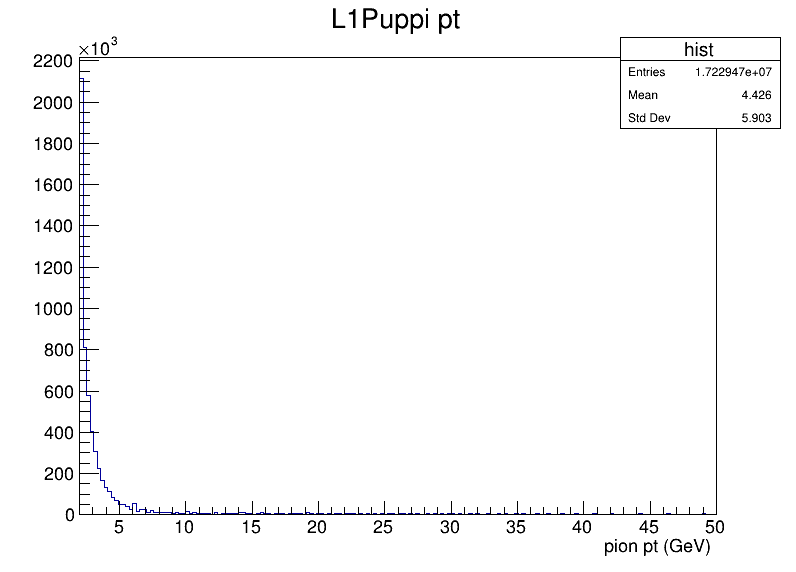

Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [7]:
auto gen_pt   = df.Take<ROOT::VecOps::RVec<Float_t>>("L1Puppi_pt").GetValue();
std::vector<double> pts;

for (const auto& pti : gen_pt) {
    pts.insert(pts.end(), pti.begin(), pti.end());
}
int i=0;
TH1F* hist_genpt = new TH1F("hist", "L1Puppi pt; pion pt (GeV)", 180, 2, 50); //GeV
for (const auto &p : pts){
    hist_genpt->Fill(p);
    i++;
}

auto c1 = new TCanvas("c1", "c1", 800,600);
hist_genpt->Draw();
// c1->SetLogy();
c1->Draw();


## Eta

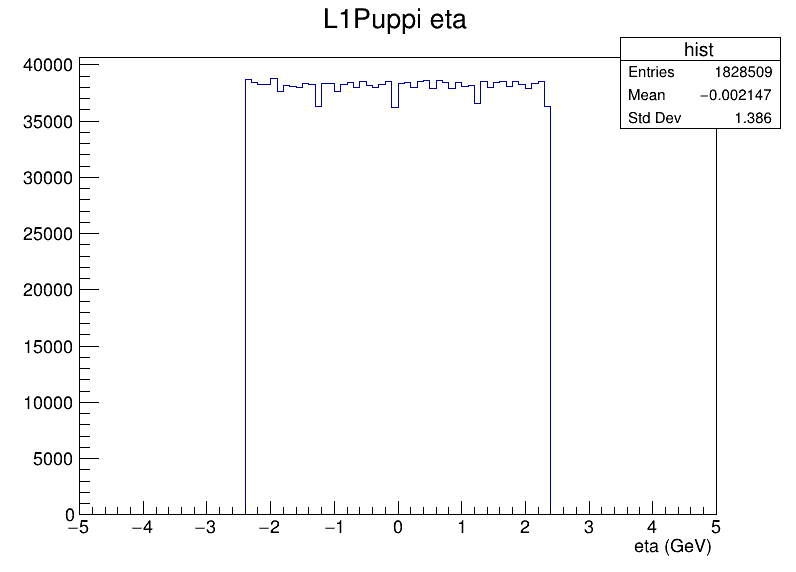

Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [9]:
auto gen_eta   = df.Take<ROOT::VecOps::RVec<Float_t>>("eta").GetValue();
std::vector<double> etas;

for (const auto& etai : gen_eta) {
    etas.insert(etas.end(), etai.begin(), etai.end());
}

TH1F* hist_geneta = new TH1F("hist", "L1Puppi eta; eta (GeV)", 100, -5, 5); //GeV
for (const auto &e : etas){
    hist_geneta->Fill(e);
}

auto c1 = new TCanvas("c1", "c1", 800,600);
hist_geneta->Draw();
c1->Draw();

In [8]:
auto np = df.Take<UShort_t>("Npuppi").GetValue();
np.size()

(unsigned long) 59994


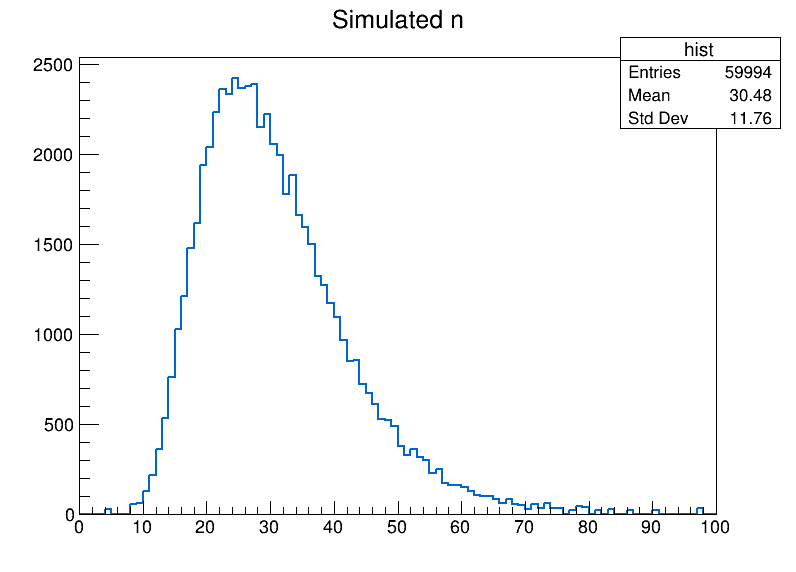

51,35,26,28,17,45,22,52,30,28,40,25,33,27,30,24,33,19,54,30,37,29,52,24,38,42,19,29,27,22,33,26,74,30,48,23,31,45,23,39,59,32,22,48,41,27,18,27,36,52,53,23,40,28,18,26,57,32,29,25,28,43,24,33,25,81,29,60,26,28,28,29,16,55,49,26,15,36,17,31,18,30,55,27,27,37,40,31,28,36,20,31,81,33,21,47,34,27,45,28,59,23,19,48,30,37,44,34,22,27,41,36,41,19,19,46,22,45,62,21,38,31,33,40,40,25,43,26,26,25,23,43,28,22,17,28,21,15,20,25,23,26,21,43,23,28,36,20,27,41,29,44,48,38,20,31,10,31,33,51,58,28,25,27,34,23,31,31,25,28,25,62,4,26,15,21,13,36,23,56,47,29,28,37,74,17,29,44,16,19,15,25,22,45,28,43,16,24,37,29,83,33,16,29,19,22,55,34,25,26,15,21,38,13,33,53,41,34,32,53,24,16,22,31,41,11,20,44,28,61,17,21,32,37,25,20,17,27,36,39,25,29,40,45,25,23,21,20,30,41,32,27,35,44,20,11,19,44,36,22,37,35,29,36,13,22,19,18,25,28,42,31,28,50,22,36,28,36,25,31,44,18,36,37,19,22,44,27,31,44,17,43,25,13,21,35,45,64,30,48,39,62,28,29,55,24,23,35,36,18,38,50,32,21,48,27,15,49,27,46,32,32,37,27,28,19,22,49,35,20,40,24,39,14

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).


In [22]:
auto np = df.Take<UShort_t>("Npuppi").GetValue();
auto c1 = new TCanvas("c1", "c1", 800,600);

TH1F* hist_n = new TH1F("hist", "Simulated n; ", 100, 0, 100); //GeV
for (const auto &n : np){
    hist_n->Fill(n);
    std::cout << n << ",";
}

hist_n -> SetLineColor(kAzure+2);
hist_n -> SetLineWidth(2);

hist_n->Draw();
c1->Draw();
std::cout << np[0];

In [11]:
std::vector<int> pit;

pit.resize(10);
pit[0] = 1;

pit

(std::vector<int> &) { 1, 0, 0, 0, 0, 0, 0, 0, 0, 0 }


## read Tree

In [2]:
ROOT::RDataFrame dft("Events","Tree.root");
dft.Describe()

(ROOT::RDF::RDFDescription) Dataframe from TChain Events in file Tree.root

Property                Value
--------                -----
Columns in total           13
Columns from defines        0
Event loops run             0
Processing slots            1

Column          Type                            Origin
------          ----                            ------
L1Puppi_dxy     ROOT::VecOps::RVec<Float_t>     Dataset
L1Puppi_eg_id   ROOT::VecOps::RVec<UInt_t>      Dataset
L1Puppi_eta     ROOT::VecOps::RVec<Float_t>     Dataset
L1Puppi_phi     ROOT::VecOps::RVec<Float_t>     Dataset
L1Puppi_pid     ROOT::VecOps::RVec<Short_t>     Dataset
L1Puppi_pt      ROOT::VecOps::RVec<Float_t>     Dataset
L1Puppi_quality ROOT::VecOps::RVec<Int_t>       Dataset
L1Puppi_wpuppi  ROOT::VecOps::RVec<Float_t>     Dataset
L1Puppi_z0      ROOT::VecOps::RVec<Float_t>     Dataset
NPuppi          UShort_t                        Dataset
bx              UShort_t                        Dataset
orbit           U

In [24]:
auto gen_pt = dft.Take<ROOT::VecOps::RVec<Float_t>>("L1Puppi_pt").GetValue();
std::cout << gen_pt.size() << std::endl;
std::cout <<  gen_pt[9] << std::endl;
std::cout << gen_pt0[9];

59994
{ 2.75, 2, 3.25, 5.25, 22, 14.25, 4, 2, 4.25, 2, 2, 2, 12.25, 2, 2.25, 3.5, 31.5, 2.5, 2, 2, 2.75, 3.75, 2.5, 4.5, 2.25, 2, 2.25, 18 }
{ 2.75, 2, 3.25, 5.25, 22, 14.25, 4, 2, 4.25, 2, 2, 2, 12.25, 2, 2.25, 3.5, 31.5, 2.5, 2, 2, 2.75, 3.75, 2.5, 4.5, 2.25, 2, 2.25, 18 }

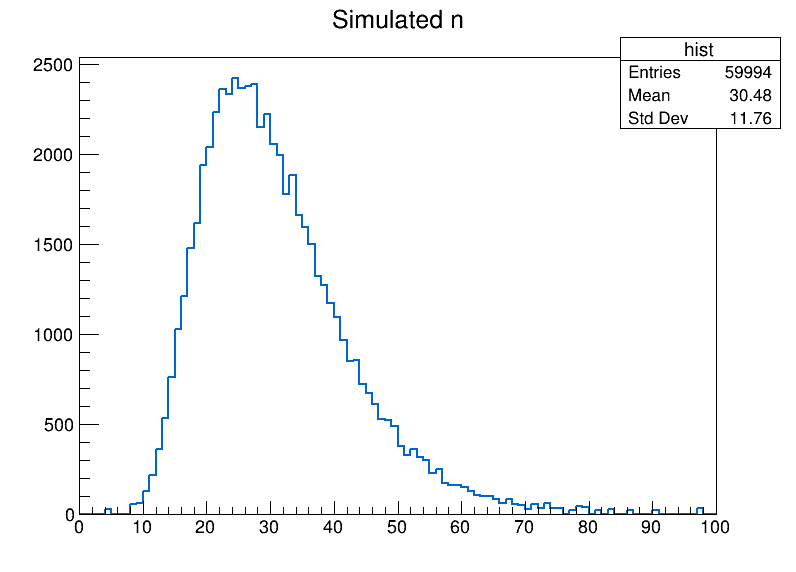

51,35,26,28,17,45,22,52,30,28,40,25,33,27,30,24,33,19,54,30,37,29,52,24,38,42,19,29,27,22,33,26,74,30,48,23,31,45,23,39,59,32,22,48,41,27,18,27,36,52,53,23,40,28,18,26,57,32,29,25,28,43,24,33,25,81,29,60,26,28,28,29,16,55,49,26,15,36,17,31,18,30,55,27,27,37,40,31,28,36,20,31,81,33,21,47,34,27,45,28,59,23,19,48,30,37,44,34,22,27,41,36,41,19,19,46,22,45,62,21,38,31,33,40,40,25,43,26,26,25,23,43,28,22,17,28,21,15,20,25,23,26,21,43,23,28,36,20,27,41,29,44,48,38,20,31,10,31,33,51,58,28,25,27,34,23,31,31,25,28,25,62,4,26,15,21,13,36,23,56,47,29,28,37,74,17,29,44,16,19,15,25,22,45,28,43,16,24,37,29,83,33,16,29,19,22,55,34,25,26,15,21,38,13,33,53,41,34,32,53,24,16,22,31,41,11,20,44,28,61,17,21,32,37,25,20,17,27,36,39,25,29,40,45,25,23,21,20,30,41,32,27,35,44,20,11,19,44,36,22,37,35,29,36,13,22,19,18,25,28,42,31,28,50,22,36,28,36,25,31,44,18,36,37,19,22,44,27,31,44,17,43,25,13,21,35,45,64,30,48,39,62,28,29,55,24,23,35,36,18,38,50,32,21,48,27,15,49,27,46,32,32,37,27,28,19,22,49,35,20,40,24,39,14

In [5]:
auto np = dft.Take<UShort_t>("NPuppi").GetValue();
auto c1 = new TCanvas("c1", "c1", 800,600);

TH1F* hist_n = new TH1F("hist", "Simulated n; ", 100, 0, 100); //GeV
for (const auto &n : np){
    hist_n->Fill(n);
    std::cout << n << ",";
}

hist_n -> SetLineColor(kAzure+2);
hist_n -> SetLineWidth(2);

hist_n->Draw();
c1->Draw();

# Read the snapshot

## snapshot selection.cpp

In [14]:
ROOT::RDataFrame df_sel("SelectedEvents","snapshots/snapshot.root");
auto pt = df_sel.Take<ROOT::VecOps::RVec<float>>("pt").GetValue();
std::cout << pt.size() << std::endl;
std::cout << pt[0] << std::endl;

332
{ 2.5, 6, 3.25, 23.25, 2.5, 5.5, 4.25, 2.25, 2.5, 2.5, 2.5, 2.25, 2.25, 17.75, 2, 2, 4.25, 2.75, 8.25, 3.25, 22 }


## snapshot events

In [10]:
ROOT::RDataFrame df_snap("SelectedEvents","snapshots/snapshot_events.root");
df_snap.Describe()

(ROOT::RDF::RDFDescription) Dataframe from TChain SelectedEvents in file snapshots/snapshot_events.root

Property                Value
--------                -----
Columns in total            3
Columns from defines        0
Event loops run             0
Processing slots            1

Column  Type                            Origin
------  ----                            ------
eta     ROOT::VecOps::RVec<float>       Dataset
phi     ROOT::VecOps::RVec<float>       Dataset
pt      ROOT::VecOps::RVec<float>       Dataset


In [12]:
auto pt = df_snap.Take<ROOT::VecOps::RVec<float>>("pt").GetValue();
std::cout << pt.size() << std::endl;
std::cout << pt[0] << std::endl;

332
{ 2.5, 6, 3.25, 23.25, 2.5, 5.5, 4.25, 2.25, 2.5, 2.5, 2.5, 2.25, 2.25, 17.75, 2, 2, 4.25, 2.75, 8.25, 3.25, 22 }


## snapshot triplet

In [6]:
ROOT::RDataFrame df_triplet("SelectedTriplet","snapshots/snapshot_triplet.root");
df_triplet.Describe()

(ROOT::RDF::RDFDescription) Dataframe from TChain SelectedTriplet in file snapshots/snapshot_triplet.root

Property                Value
--------                -----
Columns in total            3
Columns from defines        0
Event loops run             0
Processing slots            1

Column          Type                            Origin
------          ----                            ------
Pions_eta       ROOT::VecOps::RVec<float>       Dataset
Pions_phi       ROOT::VecOps::RVec<float>       Dataset
Pions_pt        ROOT::VecOps::RVec<float>       Dataset


In [8]:
auto pt = df_triplet.Take<ROOT::VecOps::RVec<float>>("Pions_pt").GetValue();
std::cout << pt.size() << std::endl;
std::cout << pt[0];

332
{ 23.25, 22, 17.75 }

# Read RNTuple

In [54]:
ROOT::RDataFrame drn = ROOT::RDF::Experimental::FromRNTuple("Events", "RNtuple.root");
drn.Describe()

(ROOT::RDF::RDFDescription) Dataframe from datasource RNTupleDS

Property                Value
--------                -----
Columns in total           12
Columns from defines        0
Event loops run             0
Processing slots            1

Column          Type                                    Origin
------          ----                                    ------
Puppi.dxy       ROOT::VecOps::RVec<float>               Dataset
Puppi.eg_id     ROOT::VecOps::RVec<std::uint8_t>        Dataset
Puppi.eta       ROOT::VecOps::RVec<float>               Dataset
Puppi.pdgId     ROOT::VecOps::RVec<std::int32_t>        Dataset
Puppi.phi       ROOT::VecOps::RVec<float>               Dataset
Puppi.pt        ROOT::VecOps::RVec<float>               Dataset
Puppi.quality   ROOT::VecOps::RVec<std::uint8_t>        Dataset
Puppi.wpuppi    ROOT::VecOps::RVec<float>               Dataset
Puppi.z0        ROOT::VecOps::RVec<float>               Dataset
bx              std::uint16_t                       

Warning in <[ROOT.NTuple] Warning /home/conda/feedstock_root/build_artifacts/root_base_1679383249393/work/root-source/tree/ntuple/v7/src/RNTupleSerialize.cxx:1148 in static ROOT::Experimental::RResult<void> ROOT::Experimental::Internal::RNTupleSerializer::DeserializeHeaderV1(const void*, uint32_t, ROOT::Experimental::RNTupleDescriptorBuilder&)>: Pre-release format version: RC 1


In [57]:
*drn.Count()

(unsigned long long) 59994


In [58]:
auto pt = drn.Take<ROOT::VecOps::RVec<float>>("Puppi.pt").GetValue();
std::cout << pt.size() << std::endl;
std::cout << pt[0];

59994
{ 2, 3.75, 2, 10, 2.75, 2.25, 3, 3.75, 2.25, 2, 2, 2.5, 17.25, 2.25, 10, 2, 2.75, 4.25, 3.5, 3, 10.75, 3.5, 4.5, 2.75, 3.75, 2, 12.25, 3.25, 3.5, 29.25, 2.75, 2.5, 2.25, 5, 2, 2.25, 2.25, 2, 2.25, 3.25, 2.25, 2.25, 2.75, 2.75, 3.25, 2.5, 3, 4.5, 4.75, 2.5, 2 }

# Read Giovanni


In [5]:
ROOT::RDataFrame df("Events","Unpack_Select/tree_gp.root");
df.Describe();
*df.Count()

(unsigned long long) 59994


In [ ]:
    // uint8_t npuppi8;  // issues with uint8_t that root sees to max at 127


# Read test

In [11]:
ROOT::RDataFrame df_test1("Events", "tree_test/tree-di-prova.root");
df_test1.Describe().Print();

std::cout << "\n"<< *df_test1.Count();
auto np = df_test1.Take<UShort_t>("nPuppi").GetValue();
auto c1 = new TCanvas("c1", "c1", 800,600);

TH1F* hist_n = new TH1F("hist", "Simulated n; ", 100, 0, 100); //GeV
for (const auto &n : np){
    hist_n->Fill(n);
    std::cout << n << ",";
}

hist_n -> SetLineColor(kAzure+2);
hist_n -> SetLineWidth(2);

hist_n->Draw();
c1->Draw();